In [1]:
from utils import *
from MySolution import MyClassifier, MyClustering, MyLabelSelection


/u/project/sriram/zhengton/courses/ECE236A/Code/MySolution.py:462: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if task is 2:
/u/project/sriram/zhengton/courses/ECE236A/Code/MySolution.py:495: SyntaxWarning: "is" with a literal. Did you mean "=="?
  elif task is 1:


Synthetic data shape:  (1000, 2) (1000,)


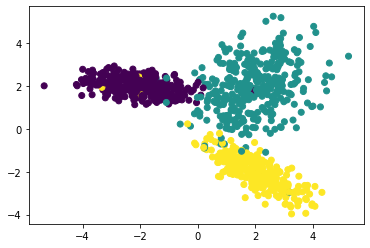

In [2]:
# Get datasets
syn_data = prepare_synthetic_data()
print("Synthetic data shape: ", syn_data['trainX'].shape, syn_data['trainY'].shape)

plt.scatter(syn_data['trainX'][:, 0], syn_data['trainX'][:, 1], c=syn_data['trainY'])

Synthetic data shape:  (1000, 2) (1000,)


100% 30/30 [00:01<00:00, 16.11it/s]


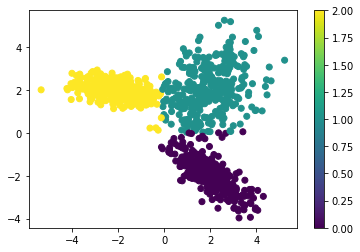

In [3]:
# Get datasets

syn_data = prepare_synthetic_data()
print("Synthetic data shape: ", syn_data['trainX'].shape, syn_data['trainY'].shape)
model = MyClustering(K=3)
model.train(syn_data['trainX'], iteration=30)
y_hat = model.infer_cluster(syn_data['trainX'])
# plt.scatter(syn_data['trainX'][:, 0], syn_data['trainX'][:, 1], c=y_hat)
plt.scatter(syn_data['trainX'][:, 0], syn_data['trainX'][:, 1], c=y_hat)
plt.colorbar()

# x_line = np.linspace(-5, 5, 100)
# for key in model.SVM_table.keys():
#     w, b = model.SVM_table[key]
#     y_line = (-b - w[0] * x_line) / w[1]
#     print(w[0], w[1])
#     if w[1] >= 1:
#         plt.plot(x_line, y_line, label=str(key))

# x_line = np.linspace(-0.1, 0.1, 100)
# w, b = model.SVM_table[(0, 1)]
# y_line = (-b - w[0] * x_line) / w[1]
# print(w[0], w[1])
# plt.plot(x_line, y_line, label=str((0,1)))

# plt.legend()

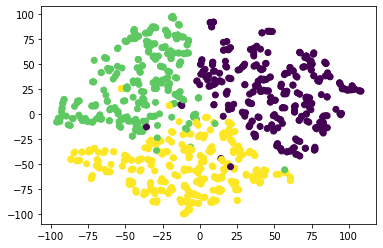

In [57]:
plt.scatter(new_trainX[:, 0], new_trainX[:, 1], c=mnist_data['trainY'])

[t-SNE] Computing 10 nearest neighbors...
[t-SNE] Indexed 1500 samples in 0.001s...
[t-SNE] Computed neighbors for 1500 samples in 0.082s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1500
[t-SNE] Computed conditional probabilities for sample 1500 / 1500
[t-SNE] Mean sigma: 1.426351
[t-SNE] KL divergence after 250 iterations with early exaggeration: 82.043861
[t-SNE] KL divergence after 1000 iterations: 1.071825


  0% 0/100 [00:00<?, ?it/s]/u/home/z/zhengton/.local/lib/python3.9/site-packages/cvxpy/problems/problem.py:1385: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
100% 100/100 [01:03<00:00,  1.57it/s]


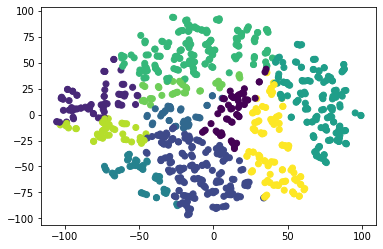

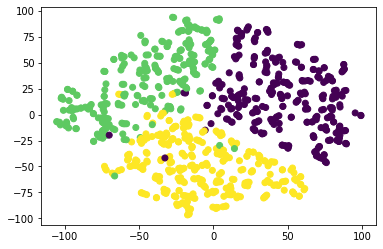

In [6]:
# from sklearn.decomposition import PCA
# from sklearn.decomposition import KernelPCA
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, perplexity=3, verbose=1)

mnist_data = prepare_mnist_data()
allX = np.concatenate([mnist_data['trainX']/255.0, mnist_data['testX']/255.0], axis=0)
allX_embedded = tsne.fit_transform(allX)
num_train = len(mnist_data['trainX'])
num_test = len(mnist_data['testX'])
new_trainX = allX_embedded[:num_train]
new_testX = allX_embedded[num_train:]

model = MyClustering(K=10)
model.train(new_trainX, iteration=100)
y_hat = model.infer_cluster(new_trainX)

plt.scatter(new_trainX[:, 0], new_trainX[:, 1], c=y_hat)
plt.figure()
plt.scatter(new_trainX[:, 0], new_trainX[:, 1], c=mnist_data['trainY'])

MNIST data shape:  (1000, 784) (1000,)


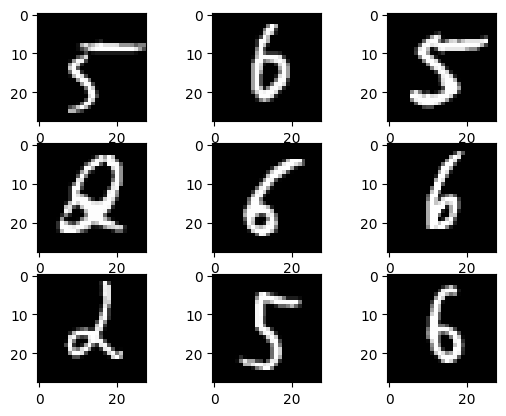

In [11]:
mnist_data = prepare_mnist_data()
print("MNIST data shape: ", mnist_data['trainX'].shape, mnist_data['trainY'].shape)

for i in range(9):	
    plt.subplot(330 + 1 + i)
    plt.imshow(mnist_data['trainX'][i].reshape(28,28), cmap='gray')
plt.show()

In [3]:
result1 = {}
syn_data = prepare_synthetic_data()
mnist_data = prepare_mnist_data()

for label, data in {'synthetic_test_accuracy': syn_data, 'mnist_test_accuracy': mnist_data}.items():
    svm = MyClassifier(K=3)
    svm.train(data['trainX'], data['trainY'])
    acc = svm.evaluate(data['testX'], data['testY'])
    result1[label] = acc
result1

====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======
====== Finish solving one SVM ======


{'synthetic_test_accuracy': 0.926, 'mnist_test_accuracy': 0.878}

In [4]:
transformed_mnist_data = mnist_data
allX = np.concatenate([mnist_data['trainX']/255.0, mnist_data['testX']/255.0], axis=0)
allX_embedded = tsne.fit_transform(allX)
num_train = len(mnist_data['trainX'])
num_test = len(mnist_data['testX'])
new_trainX = allX_embedded[:num_train]
new_testX = allX_embedded[num_train:]


{'trainX': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'trainY': array([5., 6., 5., 2., 6., 6., 2., 5., 6., 6., 5., 5., 6., 5., 2., 6., 5.,
        6., 2., 2., 5., 6., 5., 2., 2., 6., 2., 5., 6., 2., 5., 2., 6., 2.,
        5., 6., 2., 5., 6., 6., 2., 6., 5., 5., 5., 5., 2., 6., 2., 5., 6.,
        6., 2., 2., 5., 6., 2., 2., 2., 2., 5., 5., 5., 5., 6., 5., 6., 2.,
        2., 6., 2., 2., 6., 6., 2., 2., 6., 5., 6., 6., 2., 6., 5., 6., 6.,
        6., 6., 2., 6., 2., 5., 6., 2., 6., 5., 6., 6., 2., 2., 5., 2., 2.,
        5., 6., 2., 2., 6., 6., 5., 5., 6., 5., 6., 5., 2., 6., 5., 2., 2.,
        2., 2., 2., 5., 6., 6., 2., 6., 5., 5., 2., 2., 6., 2., 6., 6., 5.,
        6., 6., 6., 6., 2., 5., 5., 2., 2., 2., 6., 5., 2., 6., 6., 6., 5.,
        2., 5., 5., 2., 5., 6., 2., 6., 2., 5.,

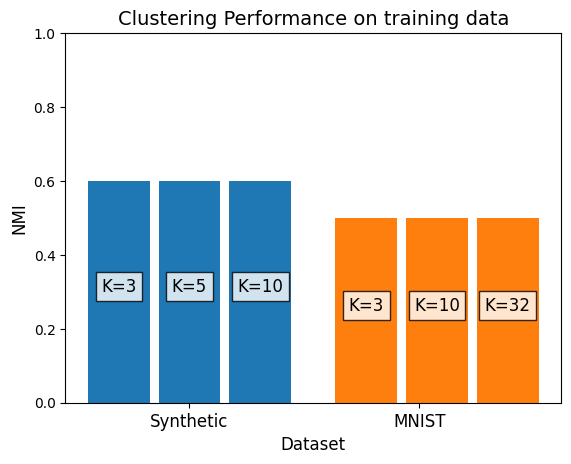

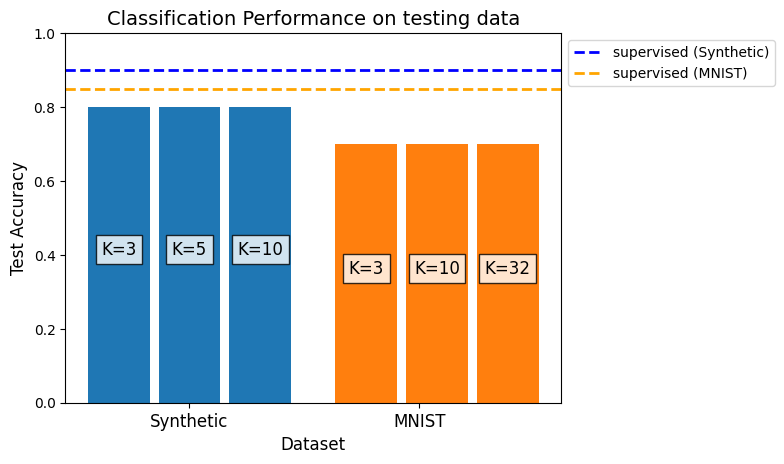

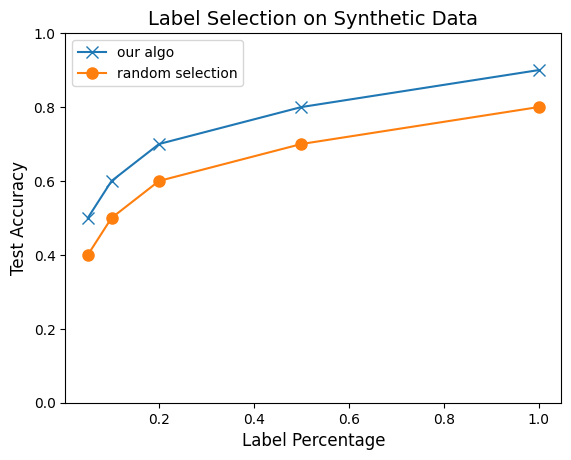

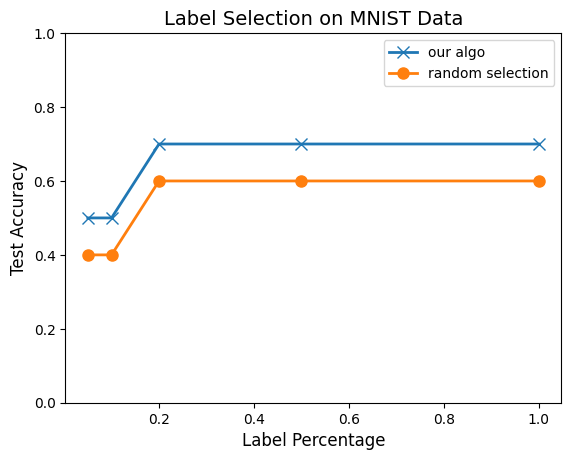

In [4]:
## TODO: Implement your solution and store the results in the following dictionaries
## Please note that the below values are given as an example to show the format, 
## you need to replace them with your values :)

result1 = {'synthetic_test_accuracy':0.9, 'mnist_test_accuracy':0.85}

result2 = {'synthetic':{'K':[3, 5, 10], 'clustering_nmi':[0.6,0.6,0.6], 'classification_accuracy':[0.8,0.8,0.8]},
            'mnist':{'K':[3, 10, 32], 'clustering_nmi':[0.5,0.5,0.5], 'classification_accuracy':[0.7,0.7,0.7]}}
                                
result3 = {'synthetic': {'label_percentage':[0.05,0.1,0.2,0.5,1], 'test_accuracy(our algo)':[0.5,0.6,0.7,0.8,0.9], 'test_accuracy(random)':[0.4,0.5,0.6,0.7,0.8]},
            'mnist': {'label_percentage':[0.05,0.1,0.2,0.5,1], 'test_accuracy(our algo)':[0.5,0.5,0.7,0.7,0.7], 'test_accuracy(random)':[0.4,0.4,0.6,0.6,0.6]}}


plot_result(result1, result2, result3)